### Importing required Modules

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import selenium
import time
import csv
from bs4 import BeautifulSoup as bs
from  selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait as wdw
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException


In [103]:
driver = webdriver.Chrome() 
driver.maximize_window()

In [104]:
driver.get('https://www.instagram.com/')
wait = wdw(driver,1000)
username = wait.until(ec.presence_of_element_located((By.NAME,'username')))
password = wait.until(ec.presence_of_element_located((By.NAME,'password')))
username.send_keys('saikamal_17')
password.send_keys('Saikamal17')

In [105]:
logIn = driver.find_elements(By.CLASS_NAME,'sqdOP')
logIn[0].submit()

### Extracting usernames with food

In [106]:
search = wait.until(ec.presence_of_element_located((By.CLASS_NAME,'QY4Ed')))
search.click()

In [107]:
while True:
    try:
        driver.find_element(By.XPATH,'//div[contains(@class,"_43CKF")]//button').click()
        driver.find_element(By.XPATH,'//button[contains(@class,"Cab_   ")]').click()
        break
    except NoSuchElementException:
        break

In [108]:
driver.find_element(By.CLASS_NAME,'XTCLo').send_keys('food')
wait.until(ec.presence_of_element_located((By.XPATH,'//a[contains(@class,"-qQT3")]')))
usernames = driver.find_elements(By.XPATH,'//a[contains(@class,"-qQT3")]//div[contains(@class,"uL8Hv")]')


### 1.1 Extracting required usernames and detais

In [109]:
users = []
for i in range(0,len(usernames)):
    name = usernames[i].text
    if name[0] != '#' and len(users)<10:
        users.append(name)
        
users

['dilsefoodie',
 'hyderabad.food.diaries',
 'foodtalkindia',
 'foodies_of_hyd',
 'food_detective_01',
 'hyderabadifoodreviews',
 'food',
 'delhifoodwalks',
 'foodwala_official',
 'houseofgravies_india']

In [110]:
driver.find_element(By.CLASS_NAME,'coreSpriteSearchClear').click()

In [111]:
followers = []
for i in users:
    #driver.find_element(By.XPATH,'//span[contains(@class, "TqC_a")]').click()
    driver.find_element(By.XPATH,'//input[contains(@class, "XTCLo")]').send_keys(i)
    wait.until(ec.presence_of_element_located((By.XPATH, "//a[@class='-qQT3']")))
    time.sleep(1)
    driver.find_element(By.XPATH,'//a[@class="-qQT3"]//div[contains(@class,"uL8Hv")]').click()
    time.sleep(3)
    wait.until(ec.presence_of_element_located((By.XPATH, '//ul[@class="k9GMp "]//a[1]')))
    followers.append(driver.find_element(By.XPATH,'//ul[@class="k9GMp "]//a[1]//span').get_attribute('title'))

    
    
followers    

['967,058',
 '167,564',
 '307,821',
 '62,368',
 '11,903',
 '114,622',
 '967,058',
 '159,662',
 '12,056',
 '104']

In [112]:
d={}
for i in range(len(users)):
    j = int(followers[i].replace(',',''))
    d[users[i]] = j 
del d['food']
top_users = []
top_followers = []
follow = list(d.values())
follow.sort(reverse = True)
for i in follow:
    for j in d :
        if d[j] ==i and len(top_users)<5:
            top_users.append(j)
            top_followers.append(i)
top_users,top_followers

(['dilsefoodie',
  'foodtalkindia',
  'hyderabad.food.diaries',
  'delhifoodwalks',
  'hyderabadifoodreviews'],
 [967058, 307821, 167564, 159662, 114622])

### 1.2 No of Posts posted in the past 3 days

In [113]:
posts_time = []
for i in top_users:
    #driver.find_element(By.XPATH,'//span[contains(@class, "TqC_a")]').click()
    driver.find_element(By.XPATH,'//input[contains(@class, "XTCLo")]').send_keys(i)
    driver.implicitly_wait(1)
    wait.until(ec.presence_of_element_located((By.XPATH, "//a[@class='-qQT3']")))
    driver.implicitly_wait(1)
    driver.find_element(By.XPATH,'//a[@class="-qQT3"]//div[contains(@class,"uL8Hv")]').click()
    posts = wait.until(ec.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"_9AhH0")]')))
    print(i,end = ' ')
    count = 0
    for j in driver.find_elements(By.XPATH,'//div[contains(@class,"_9AhH0")]'):
        j.click()
        t = wait.until(ec.presence_of_element_located((By.XPATH,'//time[contains(@class, "Nzb55")]')))
        #print(t.get_attribute('innerHTML'))
        a = t.get_attribute('innerHTML')
        if a[1] in ['h','s']:
            count += 1
        elif a[1] == 'd' and int(a[0])<=3:
            count+=1
        elif a[1] == 'w':
            driver.back()
            break
        driver.back()
    print('has posted',count,'posts in the past 3 days')
    posts_time.append(count)
        
        
    


dilsefoodie has posted 2 posts in the past 3 days
foodtalkindia has posted 2 posts in the past 3 days
hyderabad.food.diaries has posted 0 posts in the past 3 days
delhifoodwalks has posted 6 posts in the past 3 days
hyderabadifoodreviews has posted 0 posts in the past 3 days


### 1.3 Depecting using plots

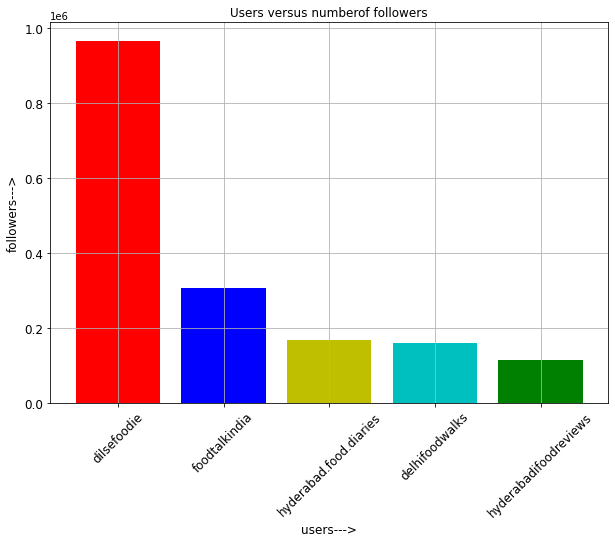

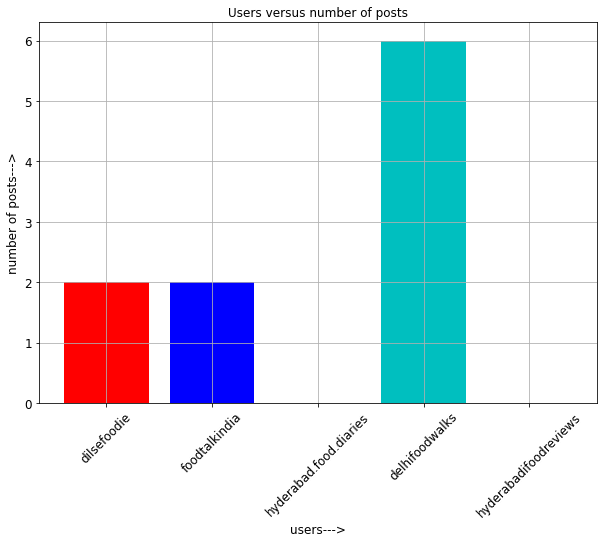

In [114]:
#plotting a graph between those top users and the number of followers
plt.figure(figsize=(10, 7))
plt.bar(top_users, top_followers, color=['r','b','y','c','g','k'])
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

#graph between top users and the number of posts
plt.figure(figsize=(10, 7))
plt.bar(top_users, posts_time, color=['r','b','y','c','g','k'])
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

### 2.1 Scrapping the content of posts of above handles with hashtags

In [115]:
content = []
hashes = []
for i in top_users:
    #driver.find_element(By.XPATH,'//span[contains(@class, "TqC_a")]').click()
    driver.find_element(By.XPATH,'//input[contains(@class, "XTCLo")]').send_keys(i)
    driver.implicitly_wait(1)
    wait.until(ec.presence_of_element_located((By.XPATH, "//a[@class='-qQT3']")))
    driver.implicitly_wait(1)
    driver.find_element(By.XPATH,'//a[@class="-qQT3"]//div[contains(@class,"uL8Hv")]').click()
    posts = wait.until(ec.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"_9AhH0")]')))
    count = 0
    for j in driver.find_elements(By.XPATH,'//div[contains(@class,"_9AhH0")]'):
        j.click()
        t = wait.until(ec.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        #print(t.get_attribute('innerHTML'))
        content.append(t.get_attribute('textContent'))
        for k in driver.find_elements(By.XPATH,'//div[contains(@class,"C4VMK")]/span/a'):
            hashes.append(k.get_attribute('innerHTML'))
        count += 1
        if count ==10:
            driver.back()
            break
        driver.back()
   

In [116]:
for i in content:
    print(i)
    print('_____________________________________________________________________________________________________________________________')

World's Best Atta Chicken #dilsefoodie #dilsecouple #attachicken
_____________________________________________________________________________________________________________________________
Jalandhar Series Coming On YouTube 😀. Thanks To @mrpettoosingh And @gurwindersinghvlogs #dilsefoodie #dilsecouple
_____________________________________________________________________________________________________________________________
Satnamio Ka Parantha Junction At Jalandhar For Special Paper Parantha. #dilsefoodie #dilsecouple
_____________________________________________________________________________________________________________________________
Aisa Khajoor Jo Sirf 3 Month He Banta Hai Punjab Mai 😃. #dilsefoodie #dilsecouple
_____________________________________________________________________________________________________________________________
Can Anyone Guess Where We Had This Amazing Delhi Style Chole Bhature In Jalandhar ? #dilsefoodie #dilsecouple #cholebhature
______________

### 2.2,2.3 Csv file containing words and there frequency

In [ ]:
d= {}
for i in content:
    for j in i.split():
        if '@' not in j  and '#' not in j:
            d[j] = d.get(j,0)+1
df = pd.DataFrame()
df['Words'] = list(d.keys())
df['Frequency'] = list(d.values())
df.to_csv('WordFrequrncy.csv',index = False)

### 2.4 Hastags used by bloggers

In [117]:
d = {}
for i in hashes:
    if i[0] == '#':
        d[i] = d.get(i,0)+1

hash_tags = np.array(list(d.keys()))
frequency = np.array(list(d.values()))
hash_tags = hash_tags[np.argsort(frequency)][::-1]
frequency = frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_tags)):
    print(hash_tags[i],end = ' ---> ')
    print(frequency[i])

#food ---> 21
#hyderabad ---> 16
#dilsefoodie ---> 10
#fyp ---> 10
#shotoniphone ---> 10
#foodlove ---> 10
#hyderabadifoodreviews ---> 10
#HFR ---> 10
#explore ---> 10
#dilsecouple ---> 10
#hyderabadfooddiaries ---> 9
#foodporn ---> 8
#foodblogger ---> 8
#hyderabadfoodbloggers ---> 8
#foodphotography ---> 7
#foodies ---> 7
#hyderabadbloggers ---> 7
#love ---> 7
#indianfoodblogger ---> 6
#foodreels ---> 6
#chicken ---> 6
#biryani ---> 6
#watch_hyd_world ---> 6
#foodbloggersofinstagram ---> 6
#instagood ---> 6
#foodbloggers ---> 6
#happiness ---> 6
#foodbloggerindia ---> 6
#foodlovers ---> 6
#hyderabadifood ---> 5
#HotFind ---> 5
#nonveg ---> 5
#walkwithanubhav ---> 5
#foodie ---> 5
#mutton ---> 4
#reel ---> 3
#foodtalk ---> 3
#Zazu ---> 3
#foodtalkindia ---> 3
#breakfast ---> 3
#instafood ---> 3
#foodstagram ---> 3
#vegetarian ---> 3
#instadaily ---> 3
#reels ---> 3
#andhrafood ---> 2
#dhanbad ---> 2
#biryanilovers ---> 2
#bar ---> 2
#naan ---> 2
#chhattishgarhicuisine ---> 2
#travelfor

### Pie Chart of the data

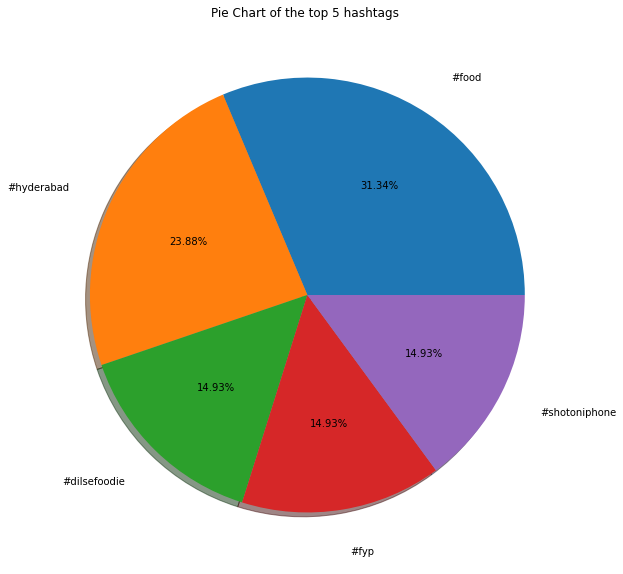

In [118]:
x=hash_tags[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

### 3.1 Extracting the information about likes for each handle

In [119]:
likes = []
for i in top_users:
    #driver.find_element(By.XPATH,'//span[contains(@class, "TqC_a")]').click()
    driver.find_element(By.XPATH,'//input[contains(@class, "XTCLo")]').send_keys(i)
    driver.implicitly_wait(1)
    wait.until(ec.presence_of_element_located((By.XPATH, "//a[@class='-qQT3']")))
    driver.implicitly_wait(3)
    driver.find_element(By.XPATH,'//a[@class="-qQT3"]//div[contains(@class,"uL8Hv")]').click()
    time.sleep(2)
    posts = wait.until(ec.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"_9AhH0")]')))
    like = 0
    count = 0
    for j in driver.find_elements(By.XPATH,'//div[contains(@class,"_9AhH0")]'):
        j.click()
        try:
            wait.until(ec.presence_of_all_elements_located((By.XPATH,'//section[contains(@class,"ygqzn")]')))
            time.sleep(0.5)
            a = driver.find_element(By.XPATH,'//section[contains(@class,"ygqzn")]//a//span').text
            if a == '':
                a = driver.find_element(By.XPATH,'//section[contains(@class,"ygqzn")]//div[contains(@class,"YlhBV")]/div/a//span').text
                h = int(a.replace(',',''))
                h = h+1
            else:
                h = int(a.replace(',',''))
        except NoSuchElementException:
            wait.until(ec.presence_of_element_located((By.XPATH,'//span[contains(@class,"vcOH2")]')))
            driver.find_element(By.XPATH,'//span[contains(@class,"vcOH2")]').click()
            wait.until(ec.presence_of_element_located((By.XPATH,'//div[contains(@class,"vJRqr")]/span')))
            a = driver.find_element(By.XPATH,'//div[contains(@class,"vJRqr")]/span').text
            h = int(a.replace(',',''))
        like += int(h)
        count += 1
        if count ==10:
            driver.back()
            break
        driver.back()
    likes.append(like)
    time.sleep(1)
   

31157
7295
9092
7033
16387
5039
7587
16197
5239
9921
315
101
401
518
137
311
602
418
522
800
26698
8640
4713
4896
4890
6141
3473
4066
4224
4624
58
218
537
515
343
315
367
512
327
255
6300
4775
3216
2798
7058
3444
27545
9679
1734
4094


In [120]:
np_top_users = np.array(top_users)
np_top_followers=np.array(top_followers)
np_likes = np.array(likes)
np_likes

array([114947,   4125,  72365,   3447,  70643])

### 3.2 Average likes 

In [121]:
np_likes = np_likes/10
np_likes

array([11494.7,   412.5,  7236.5,   344.7,  7064.3])

In [122]:
np_average = np_top_followers/np_likes
np_average

array([ 84.13077331, 746.23272727,  23.1553928 , 463.19118074,
        16.22552836])

### 3.3 Bar graph

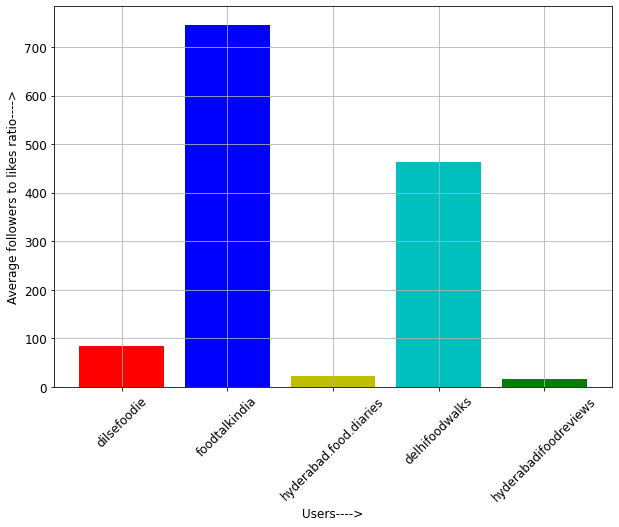

In [123]:
plt.figure(figsize=(10,7))
plt.bar(np_top_users, np_average, color=['r','b','y','c','g','k'])
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()